<a href="https://colab.research.google.com/github/JustinJohnsonK/OptionShortStraddle/blob/main/NIFTY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NIFTY DAY CHANGE ANALYSIS AND HOW TO PREDICT**

Here I collected all the historic data for nifty from [NSE website](https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm)
and calcuate the day change from opening and closing price.

Next we collect all the Central Pivot Range values and match the values to the change in nifty daily.

Hence we will be able to get a range for CPR which will help us to predict the market will be trending today or not.

This help us create straddle for intradays and create more probability for the trades taken.




In [1]:
import pandas as pd
import numpy as np
import os
import glob

# Pull data From NSE Site
Here I had already stored it in my googledrive

In [2]:
# Merge all files from Nifty historic data
# Files are downloaded and stored in local drive.
# Files are available from NSE website - details in discription
path = '/content/drive/MyDrive/NiftyData'              # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [ ]:
len(df.index)

2718

# Clean the data

In [3]:
# Sort the merged files based on date
df['Date'] = pd.to_datetime(df.Date)
df = df.sort_values(by="Date")

In [4]:
# Reset the index after sorting based on date
# This is required for calculating the CPR for previous day
df = df.reset_index(drop=True)

In [ ]:
# Test Code
for index, row in df.iterrows():
  if index > 2700:
    print(index, row["Date"])
    dfObj = df.iloc[index-1, [2, 3,4]]
    print(dfObj["Close"])


# Calculations

In [6]:
# Find Percentage chage in a day
find_change = lambda v1, v2: (abs(v1-v2)*100)/(v1)

In [7]:
# Add the Percentage Change tab to dataframe
df["Change"] = [find_change(row["Open"], row["Close"]) for index, row in df.iterrows()]

In [17]:
# Calculate CPR range or width - using previous day Low, High and Close 
def CPR_Range(index, dfObj):
  if index == 0:
    return 0

  High, Low, Close = dfObj["High"], dfObj["Low"], dfObj["Close"]
  Pivot = (High + Low + Close)/3
  Bottom_CPR = (High + Low)/2
  Top_CPR = (Pivot - Bottom_CPR) + Pivot
  return abs(Top_CPR - Bottom_CPR)

In [18]:
# Add the CPR to dataframe
df["CPR_Width"] = [CPR_Range(index, df.iloc[index-1, [2, 3,4]]) for index, _ in df.iterrows() if index<len(df.index)]

In [19]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Change,CPR_Width
0,2010-06-28,5271.10,5339.45,5270.75,5333.50,154140414,6284.06,1.183814,0.000000
1,2010-06-29,5333.55,5334.15,5235.80,5256.15,158720263,5859.41,1.451191,18.933333
2,2010-06-30,5254.25,5320.35,5210.00,5312.50,183722824,7083.92,1.108626,19.216667
3,2010-07-01,5312.05,5312.55,5232.10,5251.40,141430947,5489.08,1.141744,31.550000
4,2010-07-02,5251.25,5277.25,5225.60,5237.10,149979351,5158.26,0.269460,13.950000


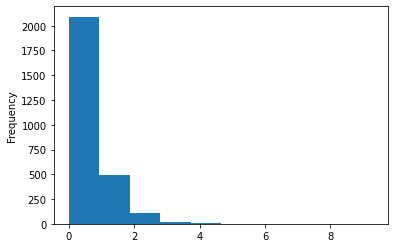

In [20]:
# Plot the Day change histogram
df["Change"].plot(kind="hist")

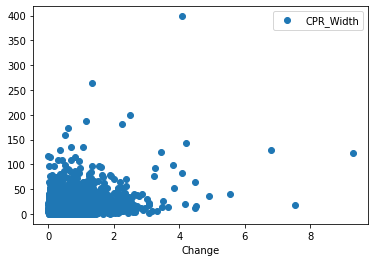

In [21]:
# Plot the relation between CPR and Nifty range
df.plot(x='Change', y='CPR_Width', style='o')